In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("/Users/daichisato/Documents/node_accident_sub_re.csv")
df=df.fillna(0)

/Users/daichisato/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df["追突フラグ"]=df.追突率.map(lambda x: 0 if x==0 else 1 if  x<0.00010 else 2)

In [6]:
df["追突フラグ"].value_counts()

0    543069
1      1843
2       552
Name: 追突フラグ, dtype: int64

In [4]:
df

,objectid,signal_f,name_kanji,name_yomi,density_5000m,density_500m,len1,len2,len3,len4,...,左折時,出会い頭,正面衝突,追突,len_count,lensum,linecntsum,lensum_mod,linecntsum_mod,追突率
0,3039662,0,0,0,1817,5,79.462619,103.554035,152.695646,0.00000,...,0.0,0.0,0.0,0.0,3,335.712300,13,1.958442,0.075838,0.0
1,3039758,0,0,0,1817,17,36.577383,377.828859,58.378316,0.00000,...,0.0,0.0,0.0,0.0,3,472.784557,13,2.758080,0.075838,0.0
2,3048457,0,0,0,1817,35,5.019972,104.641242,48.564055,0.00000,...,0.0,0.0,0.0,0.0,3,158.225270,7,0.923038,0.040836,0.0
3,3048458,0,0,0,1817,35,18.850006,59.219884,58.628580,0.00000,...,0.0,0.0,0.0,0.0,3,136.698470,7,0.797457,0.040836,0.0
4,3048459,0,0,0,1817,35,580.597893,45.769366,24.621877,0.00000,...,0.0,0.0,0.0,0.0,3,650.989137,37,3.797671,0.215847,0.0
5,3048460,0,0,0,1817,1,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000,0.000000,0.0
6,3048461,0,0,0,1817,1,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000,0.000000,0.0
7,3048462,0,0,0,1817,35,51.303188,1515.133680,5.019972,0.00000,...,0.0,0.0,0.0,0.0,3,1571.456840,92,9.167396,0.536700,0.0
8,3048463,0,0,0,1817,35,23.710727,32.444397,66.775990,0.00000,...,0.0,0.0,0.0,0.0,3,122.931115,4,0.717142,0.023335,0.0
9,3048464,0,0,0,1817,35,40.840967,273.783353,63.757748,0.00000,...,0.0,0.0,0.0,0.0,3,378.382068,7,2.207365,0.040836,0.0


In [8]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["追突フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=2395)

make_no_accidents=df[df["追突フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=2395)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["追突フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [9]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)



/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [10]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [11]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.79958246346555328

0.64377682403433478

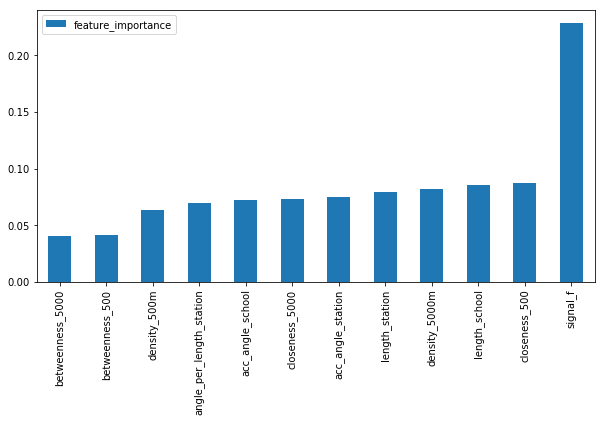

In [12]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()



